## Megatutorial 2: Clustering

In [68]:
from pandas import read_csv

In [69]:
data = read_csv("../data/fake_profiles.csv")

In [70]:
data.head(2)

,Unnamed: 0,profile_pic,rel_num_numeric_char_username,words_fullname,rel_num_numeric_char_fullname,name=username,description_length,has_external_url,is_private,num_posts,num_followers,num_follows,is_fake
0,0,yes,0.27,0,0.0,no,53,no,no,32,1000.0,955,no
1,1,yes,0.00,2,0.0,no,44,no,no,286,2740.0,533,no


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     576 non-null    int64  
 1   profile_pic                    576 non-null    object 
 2   rel_num_numeric_char_username  576 non-null    float64
 3   words_fullname                 576 non-null    int64  
 4   rel_num_numeric_char_fullname  576 non-null    float64
 5   name=username                  576 non-null    object 
 6   description_length             576 non-null    int64  
 7   has_external_url               576 non-null    object 
 8   is_private                     576 non-null    object 
 9   num_posts                      576 non-null    int64  
 10  num_followers                  556 non-null    float64
 11  num_follows                    576 non-null    int64  
 12  is_fake                        576 non-null    obj

In [72]:
# features nennen wir X (input) und targets y (output)
# das X wird groß geschrieben (weil eine Matriz) und das y klein (weil Skalare oder Vektoren)
# 80% verwenden wir zum trainieren und 20% zum testen

In [73]:
data.columns

Index(['Unnamed: 0', 'profile_pic', 'rel_num_numeric_char_username',
       'words_fullname', 'rel_num_numeric_char_fullname', 'name=username',
       'description_length', 'has_external_url', 'is_private', 'num_posts',
       'num_followers', 'num_follows', 'is_fake'],
      dtype='object')

In [74]:
data.index

RangeIndex(start=0, stop=576, step=1)

In [75]:
data.values

array([[0, 'yes', 0.27, ..., 1000.0, 955, 'no'],
       [1, 'yes', 0.0, ..., 2740.0, 533, 'no'],
       [2, 'yes', 0.1, ..., 159.0, 98, 'no'],
       ...,
       [573, 'yes', 0.57, ..., 96.0, 339, 'yes'],
       [574, 'yes', 0.57, ..., 57.0, 73, 'yes'],
       [575, 'yes', 0.27, ..., 150.0, 487, 'yes']],
      shape=(576, 13), dtype=object)

In [76]:
target = [
    "is_fake"
    ]
# das sind Spaltennamen für X

features = [
    'rel_num_numeric_char_username',
    'words_fullname', 
    'rel_num_numeric_char_fullname',
    'description_length'
]
# und das für y

# ich will nur numerische Daten

In [77]:
y = data[target]
X = data[features]

## Clustering in Scikit-Learn

In [78]:
from sklearn.cluster import KMeans, AgglomerativeClustering

#sklearn und scikit-learn sind synonyme

In [79]:
kmeans_engine = KMeans(n_clusters=3)

#Einstellen und Anwenden in zwei Schritten
kmeans_engine.fit(X)
clusters = kmeans_engine.predict(X)

#Einstellen und Anwenden in einem Schritt
# kmeans_engine.fit_predict(X)


In [80]:
X["cluster"] = clusters

/tmp/ipykernel_12413/3748292019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = clusters


<Axes: >

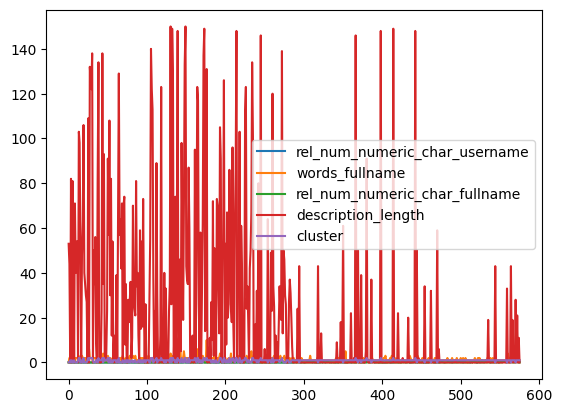

In [81]:
X.plot()

<Axes: xlabel='description_length', ylabel='words_fullname'>

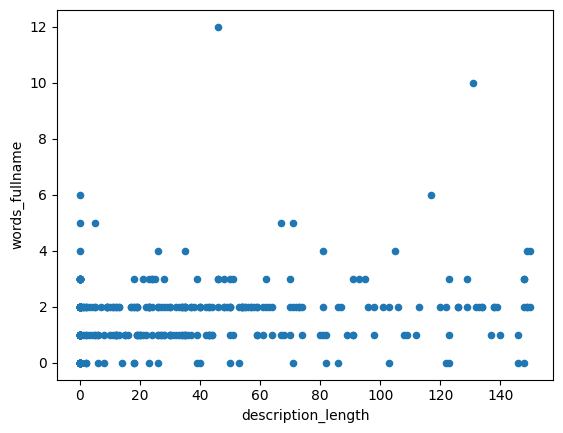

In [82]:
X.plot(
    kind = "scatter",
    x = "description_length", 
    y = "words_fullname")

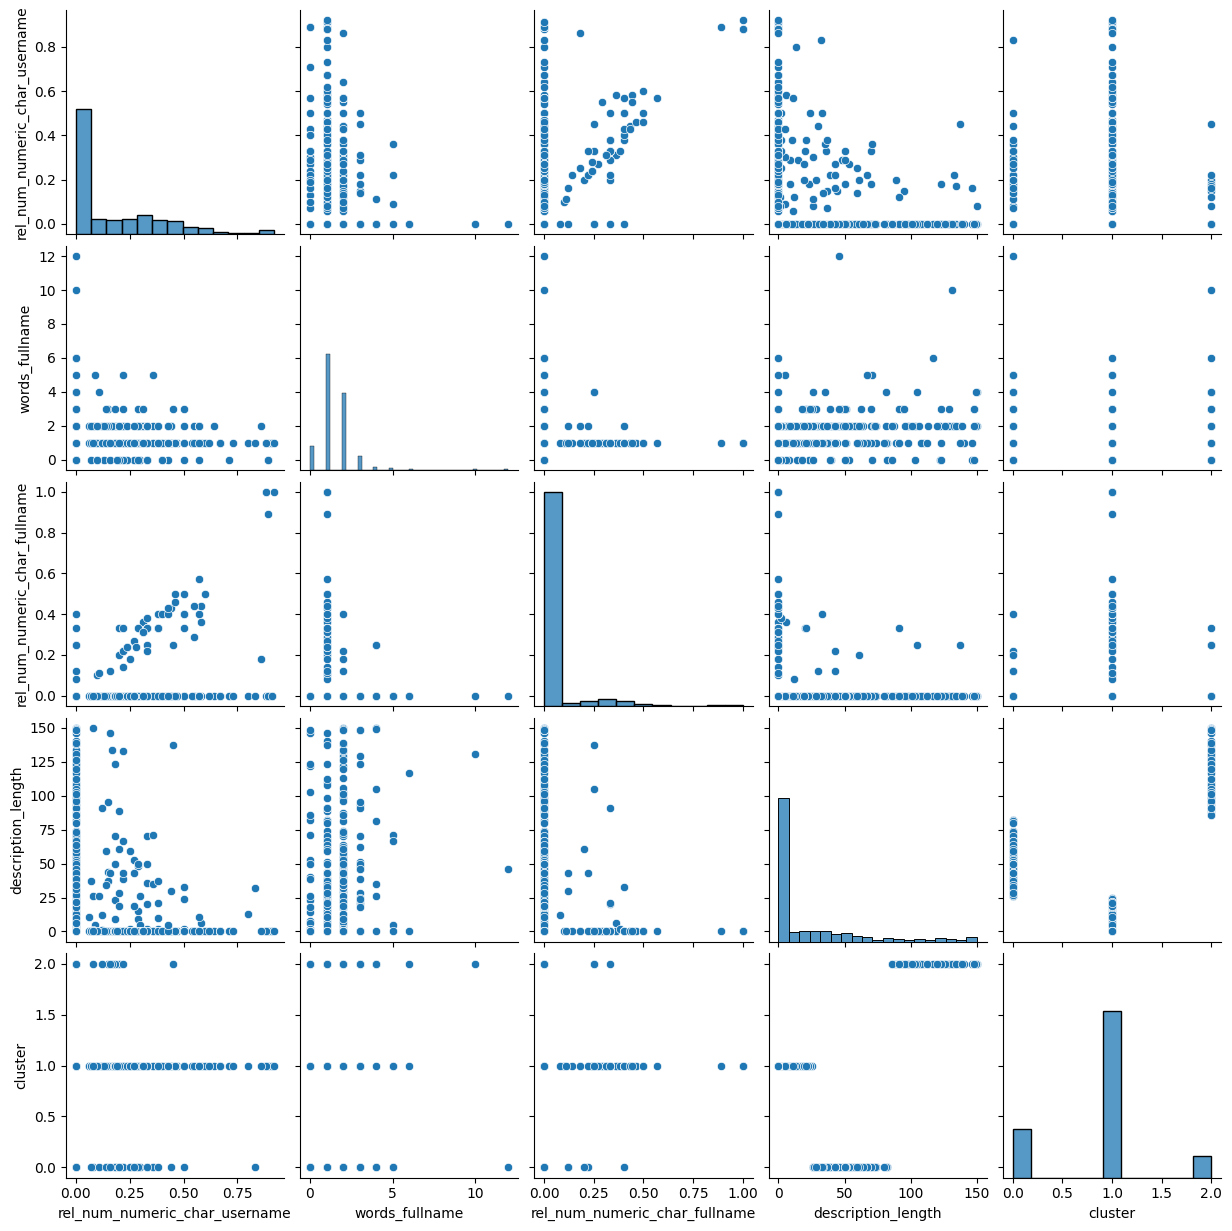

In [83]:
from seaborn import pairplot

pairplot(X)

In [84]:
clusters

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2,
       0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 0,
       2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0,
       2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1,
       0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [85]:
hierarchical_engine = AgglomerativeClustering(n_clusters=2)

hierarchical_engine.fit_predict(X)

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Clustering in Scipy

In [86]:
from scipy.cluster import hierarchy

In [87]:
hierarchy.linkage(X)

array([[  10.        ,   11.        ,    0.        ,    2.        ],
       [  56.        ,  576.        ,    0.        ,    3.        ],
       [  93.        ,  577.        ,    0.        ,    4.        ],
       ...,
       [1126.        , 1147.        ,    6.        ,  574.        ],
       [ 176.        , 1148.        ,    7.28010989,  575.        ],
       [ 142.        , 1149.        ,    9.        ,  576.        ]],
      shape=(575, 4))

In [88]:
Z = hierarchy.linkage(X)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [90.0, 90.0, 112.5, 112.5],
  [75.0, 75.0, 101.25, 101.25],
  [60.0, 60.0, 88.125, 88.125],
  [45.0, 45.0, 74.0625, 74.0625],
  [30.0, 30.0, 59.53125, 59.53125],
  [185.0, 185.0, 195.0, 195.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [315.0, 315.0, 325.0, 325.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0, 352.5, 352.5],
  [320.0, 320.0, 343.75, 343.75],
  [305.0, 305.0, 331.875, 331.875],
  [295.0, 295.0, 318.4375, 318.4375],
  [285.0, 285.0, 306.71875, 306.71875],
  [270.0, 270.0, 295.859375, 295.859375],
  [250.0, 250.0, 282.9296875, 282.9296875],
  [230.0, 230.0, 266.46484375, 266.46484375],
  [215.0, 215.0, 248.232421875, 248.232421875],
  [205.0, 205.0, 231.6162109375, 231.6162109375],
  [190.0, 190.0, 218.30810546875, 218.308105

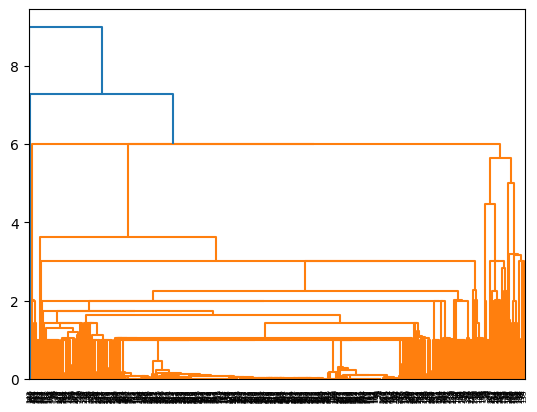

In [89]:
hierarchy.dendrogram(Z)